In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
data = pd.read_csv("full_grouped.csv")

In [43]:
data.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [44]:
data.shape

(35156, 10)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            35156 non-null  object
 1   Country/Region  35156 non-null  object
 2   Confirmed       35156 non-null  int64 
 3   Deaths          35156 non-null  int64 
 4   Recovered       35156 non-null  int64 
 5   Active          35156 non-null  int64 
 6   New cases       35156 non-null  int64 
 7   New deaths      35156 non-null  int64 
 8   New recovered   35156 non-null  int64 
 9   WHO Region      35156 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.7+ MB


In [46]:
data.isnull().sum()

Date              0
Country/Region    0
Confirmed         0
Deaths            0
Recovered         0
Active            0
New cases         0
New deaths        0
New recovered     0
WHO Region        0
dtype: int64

In [47]:
# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

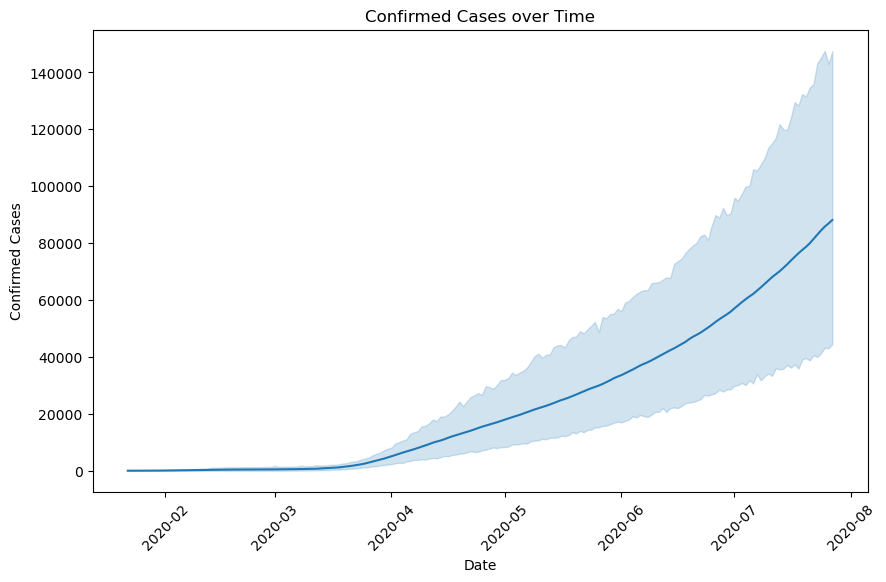

In [48]:
#Line Plot of Confirmed Cases over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Confirmed', data=data)
plt.title('Confirmed Cases over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

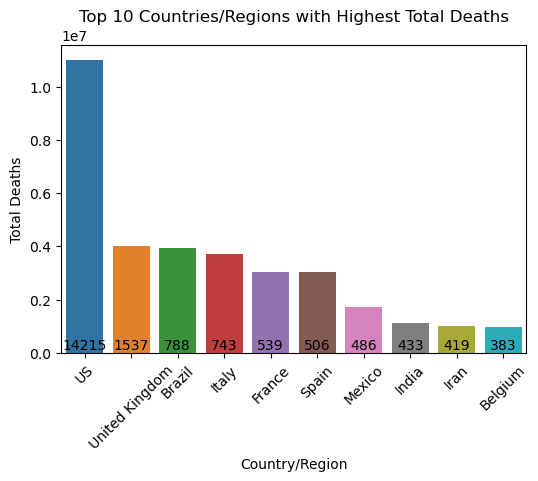

In [49]:
# Bar Plot of Total Deaths by Country/Region
total_deaths = data.groupby('Country/Region')['Deaths'].sum().reset_index()
total_deaths = total_deaths.sort_values(by='Deaths', ascending=False).head(10)
plt.figure(figsize=(6,4))
sns.barplot(x='Country/Region', y='Deaths', data=total_deaths)
plt.title('Top 10 Countries/Regions with Highest Total Deaths')
plt.xlabel('Country/Region')
plt.ylabel('Total Deaths')
plt.xticks(rotation=45)
for i, v in enumerate(data['Deaths'].value_counts()):
    plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')
plt.show()

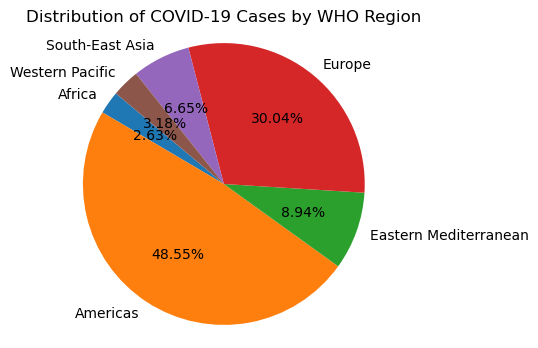

In [50]:
# Group the data by WHO Region and calculate the total number of cases in each region
region_cases = data.groupby('WHO Region')['Confirmed'].sum()
# Pie chart
plt.figure(figsize=(4,4))
plt.pie(region_cases, labels=region_cases.index, autopct='%1.2f%%', startangle=140)
plt.title('Distribution of COVID-19 Cases by WHO Region')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

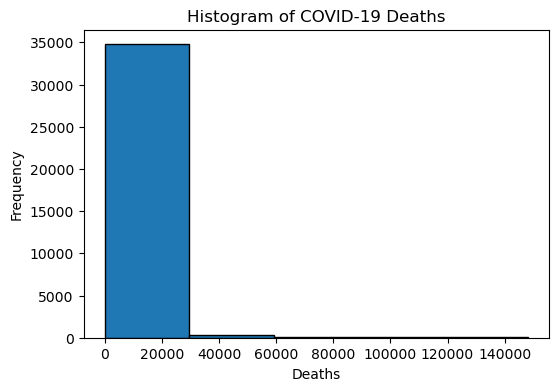

In [51]:
plt.figure(figsize=(6,4))
plt.hist(data['Deaths'], bins=5, edgecolor='k')
plt.xlabel('Deaths')
plt.ylabel('Frequency')
plt.title('Histogram of COVID-19 Deaths')
plt.show()

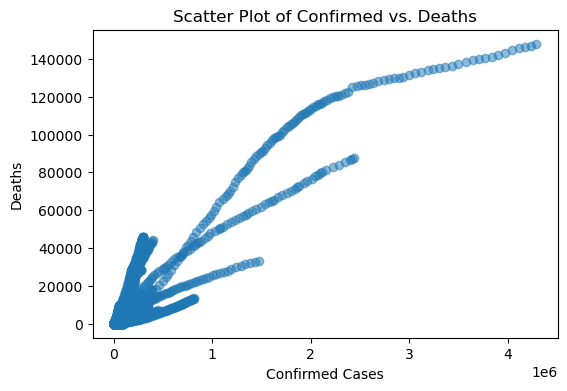

In [52]:
plt.figure(figsize=(6,4))
plt.scatter(data['Confirmed'], data['Deaths'], alpha=0.5)
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Scatter Plot of Confirmed vs. Deaths')
plt.show()

In [53]:
# Select relevant columns for the regression analysis
regression_data = data[['Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases', 'New deaths', 'New recovered']]

In [54]:
# Split the data into independent (X) and dependent (y) variables
X = regression_data.drop('Confirmed', axis=1)
y = regression_data['Confirmed']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [56]:
# Create an instance of the Linear Regression model
model = LinearRegression()

In [57]:
# Fit the model to the data
model.fit(X_train, y_train)

LinearRegression()

In [58]:
# Print the coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.55292446e-14
 -1.70303441e-13  9.18015663e-15]
Intercept: -1.9281287677586079e-10


In [59]:
# Predict the target variable using the fitted model
y_pred = model.predict(X_test)

In [60]:
# Calculate Mean Squared Error (MSE)
mse = round(mean_squared_error(y_test, y_pred),2)
print('Mean Squared Error:', mse)

# Calculate R-squared score
r2 = round(r2_score(y_test, y_pred),2)
print('R-squared Score:', r2)

Mean Squared Error: 0.0
R-squared Score: 1.0


In [61]:
dtr_reg = DecisionTreeRegressor()

In [62]:
# Fit the dtr_reg to the data
dtr_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [63]:
# Predict the target variable using the fitted dtr_reg
y_pred = dtr_reg.predict(X_test)

In [64]:
# Calculate Mean Squared Error (MSE)
mse = round(mean_squared_error(y_test, y_pred),2)
print('Mean Squared Error:', mse)

# Calculate R-squared score
r2 = round(r2_score(y_test, y_pred),2)
print('R-squared Score:', r2)

Mean Squared Error: 49664149.29
R-squared Score: 1.0


In [65]:
rfr_reg = RandomForestRegressor()

In [66]:
# Fit the rfr_reg to the data
rfr_reg.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
# Predict the target variable using the fitted rfr_reg
y_pred = rfr_reg.predict(X_test)

In [68]:
# Calculate Mean Squared Error (MSE)
mse = round(mean_squared_error(y_test, y_pred),2)
print('Mean Squared Error:', mse)

# Calculate R-squared score
r2 = round(r2_score(y_test, y_pred),2)
print('R-squared Score:', r2)

Mean Squared Error: 26642750.18
R-squared Score: 1.0


In [69]:
gbr_reg = GradientBoostingRegressor()

In [70]:
# Fit the gbr_reg to the data
gbr_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [71]:
# Predict the target variable using the fitted gbr_reg
y_pred = gbr_reg.predict(X_test)

In [72]:
# Calculate Mean Squared Error (MSE)
mse = round(mean_squared_error(y_test, y_pred),2)
print('Mean Squared Error:', mse)

# Calculate R-squared score
r2 = round(r2_score(y_test, y_pred),2)
print('R-squared Score:', r2)

Mean Squared Error: 40174036.8
R-squared Score: 1.0


In [73]:
svr_reg = SVR()

In [ ]:
# Fit the svr_reg to the data
svr_reg.fit(X_train, y_train)

In [ ]:
# Predict the target variable using the fitted svr_reg
y_pred = svr_reg.predict(X_test)

In [ ]:
# Calculate Mean Squared Error (MSE)
mse = round(mean_squared_error(y_test, y_pred),2)
print('Mean Squared Error:', mse)

# Calculate R-squared score
r2 = round(r2_score(y_test, y_pred),2)
print('R-squared Score:', r2)